In [1]:
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
plt.style.use('seaborn-darkgrid')

In [2]:
all_air = pd.read_csv('../data/cleaned/air_all_years.csv', index_col='Location')
inf_mor = pd.read_csv('../data/cleaned/infant_mortality_plus_stats.csv', index_col='Location')

In [3]:
all_air

,Year,CO 2nd Max 1-hr,CO 2nd Max 8-hr,NO2 98th Percentile 1-hr,NO2 Mean 1-hr,Ozone 2nd Max 1-hr,Ozone 4th Max 8-hr,SO2 99th Percentile 1-hr,SO2 2nd Max 24-hr,SO2 Mean 1-hr,PM2.5 98th Percentile 24-hr,PM2.5 Weighted Mean 24-hr,PM10 2nd Max 24-hr,PM10 Mean 24-hr,Lead Max 3-Mo Avg
Location,,,,,,,,,,,,,,,
Albuquerque,1999,7.500000,4.600000,54.000000,16.000000,0.100,0.076000,NaN,NaN,NaN,NaN,NaN,93.0,39.00,NaN
Atlanta,1999,6.300000,4.100000,87.000000,24.000000,0.160,0.124000,90.000000,23.000000,5.000,48.000000,23.000000,72.0,35.00,NaN
Austin,1999,2.100000,1.200000,NaN,6.000000,0.110,0.099000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Baltimore,1999,10.200000,5.600000,70.000000,24.000000,0.150,0.113000,79.000000,20.000000,6.000,NaN,NaN,61.0,32.00,NaN
Boston,1999,8.400000,4.200000,77.000000,30.000000,0.120,0.093000,93.000000,40.000000,8.000,47.000000,15.300000,65.0,30.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wichita,2018,NaN,NaN,40.000000,8.000000,0.080,0.067000,4.000000,2.000000,1.000,20.000000,8.200000,86.0,31.00,NaN
National Means,2018,3.068182,1.909091,49.756098,14.214286,0.095,0.075409,14.256410,4.230769,0.725,31.568182,10.120455,100.9,25.15,0.038
National First Quartile,2018,1.700000,1.200000,43.000000,11.000000,0.090,0.071000,3.750000,1.000000,0.000,21.000000,8.900000,41.0,16.00,0.010


In [4]:
inf_mor

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Location,,,,,,,,,,,,,,,,,,,,
Albuquerque,6.900000,6.500000,5.700000,6.900000,4.500000,6.400000,5.100000,5.200000,4.866667,4.533333,4.200000,4.500000,5.500000,6.600000,5.700000,5.9,4.900000,7.200000,5.500000,5.600000
Atlanta,9.200000,7.800000,7.700000,1.300000,1.100000,NaN,3.100000,7.300000,8.500000,9.700000,10.900000,6.700000,9.300000,5.500000,5.500000,7.9,8.400000,6.500000,5.900000,4.600000
Austin,5.100000,4.600000,5.300000,4.600000,6.200000,4.900000,5.400000,5.600000,5.566667,5.533333,5.500000,4.900000,4.400000,4.500000,4.200000,4.6,3.600000,3.400000,3.700000,3.300000
Baltimore,14.100000,11.600000,11.300000,9.900000,12.800000,12.500000,11.200000,12.200000,12.636667,13.073333,13.510000,2.000000,10.800000,10.000000,10.200000,10.4,7.700000,8.500000,8.200000,8.600000
Boston,7.400000,6.700000,7.200000,6.900000,6.100000,6.200000,5.100000,5.900000,6.166667,6.433333,6.700000,3.800000,5.300000,4.900000,4.700000,6.3,5.500000,5.300000,4.700000,4.000000
Charlotte,6.500000,8.900000,8.300000,8.600000,7.200000,9.800000,8.800000,7.300000,6.966667,6.633333,6.300000,6.000000,6.200000,5.600000,6.500000,6.0,6.200000,7.200000,5.100000,4.900000
Chicago,12.200000,10.900000,9.500000,9.000000,10.000000,8.900000,9.100000,7.200000,7.466667,7.733333,8.000000,7.500000,7.900000,7.700000,6.600000,7.0,7.800000,6.900000,6.700000,7.200000
Cleveland,13.000000,13.200000,11.200000,14.700000,10.000000,14.800000,15.000000,14.000000,14.100000,14.200000,14.300000,13.500000,14.100000,13.400000,13.500000,11.3,17.000000,12.200000,13.300000,14.600000
Colorado Springs,8.800000,7.800000,6.200000,6.900000,7.200000,8.700000,7.800000,10.000000,9.066667,8.133333,7.200000,7.600000,7.100000,5.200000,4.800000,4.1,5.500000,5.400000,5.700000,4.300000


In [21]:
denver_index, ny_index = 11, 28

In [22]:
inf_mor.iloc[denver_index]

1999    6.2
2000    6.0
2001    5.3
2002    7.1
2003    7.0
2004    6.6
2005    8.8
2006    5.2
2007    5.8
2008    6.4
2009    7.0
2010    6.1
2011    4.5
2012    5.6
2013    7.3
2014    4.4
2015    5.5
2016    4.8
2017    3.5
2018    4.4
Name: Denver, dtype: float64

In [23]:
inf_mor.iloc[ny_index]

1999    6.700000
2000    6.400000
2001    5.600000
2002    5.900000
2003    6.200000
2004    6.100000
2005    5.600000
2006    5.700000
2007    5.466667
2008    5.233333
2009    5.000000
2010    4.600000
2011    4.500000
2012    4.600000
2013    4.200000
2014    4.000000
2015    4.100000
2016    3.800000
2017    4.200000
2018    3.500000
Name: New York City, dtype: float64

In [5]:
all_air.index

Index(['Albuquerque', 'Atlanta', 'Austin', 'Baltimore', 'Boston', 'Charlotte',
       'Chicago', 'Cleveland', 'Colorado Springs', 'Columbus',
       ...
       'Seattle', 'Tucson', 'Tulsa', 'Virginia Beach', 'District of Columbia',
       'Wichita', 'National Means', 'National First Quartile',
       'National Median', 'National Third Quartile'],
      dtype='object', name='Location', length=980)

In [6]:
inf_mor.columns = inf_mor.columns.astype(int)
inf_mor.columns.dtype

dtype('int64')

In [7]:
all_air.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, Albuquerque to National Third Quartile
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         980 non-null    int64  
 1   CO 2nd Max 1-hr              959 non-null    float64
 2   CO 2nd Max 8-hr              963 non-null    float64
 3   NO2 98th Percentile 1-hr     831 non-null    float64
 4   NO2 Mean 1-hr                873 non-null    float64
 5   Ozone 2nd Max 1-hr           974 non-null    float64
 6   Ozone 4th Max 8-hr           974 non-null    float64
 7   SO2 99th Percentile 1-hr     835 non-null    float64
 8   SO2 2nd Max 24-hr            836 non-null    float64
 9   SO2 Mean 1-hr                838 non-null    float64
 10  PM2.5 98th Percentile 24-hr  920 non-null    float64
 11  PM2.5 Weighted Mean 24-hr    920 non-null    float64
 12  PM10 2nd Max 24-hr           945 non-null    float64


In [8]:
def get_pvalue_from_corr(r, n):
    t_stat = (r*(np.sqrt(n-2)))/(np.sqrt(1-r**2))
    return t.sf(abs(t_stat), df=n-2)

In [14]:
def correlation_by_city(air_df, inf_mor_df):
    inf_mor.columns = inf_mor.columns.astype(int)
    city_dfs = []
    n=20
    for city in air_df.index.unique():
        if city not in ['National Means', 'National First Quartile', 'National Median', 'National Third Quartile']:
            df = air_df.loc[city]
            df.set_index('Year', drop=True, inplace=True)
            df = df.transpose()
            df = df.append(inf_mor_df.loc[city])
            df = df.rename(index={city:'Infant Mortality'})
            df.drop(index='Lead Max 3-Mo Avg', inplace=True)
            corr = df.corrwith(df.loc['Infant Mortality'], axis=1)
            corr = pd.DataFrame(data=corr, columns=['Correlation Coefficient'])
            corr.drop(index='Infant Mortality', inplace=True)
            corr.reset_index(inplace=True)
            corr.insert(0, 'Location', city)
            corr['p-value'] = get_pvalue_from_corr(corr['Correlation Coefficient'], n)
            corr['Significant?'] = corr['p-value'] <= .025
#             return corr
            city_dfs.append(corr)
    return city_dfs
#     return len(city_dfs)
            

In [15]:
correlation_by_city(all_air, inf_mor)

[       Location                        index  Correlation Coefficient  \
 0   Albuquerque              CO 2nd Max 1-hr                 0.055738   
 1   Albuquerque              CO 2nd Max 8-hr                 0.181108   
 2   Albuquerque     NO2 98th Percentile 1-hr                -0.261378   
 3   Albuquerque                NO2 Mean 1-hr                 0.194113   
 4   Albuquerque           Ozone 2nd Max 1-hr                 0.138491   
 5   Albuquerque           Ozone 4th Max 8-hr                 0.139424   
 6   Albuquerque     SO2 99th Percentile 1-hr                 0.643823   
 7   Albuquerque            SO2 2nd Max 24-hr                 0.203716   
 8   Albuquerque                SO2 Mean 1-hr                 0.311181   
 9   Albuquerque  PM2.5 98th Percentile 24-hr                 0.340750   
 10  Albuquerque    PM2.5 Weighted Mean 24-hr                 0.415057   
 11  Albuquerque           PM10 2nd Max 24-hr                 0.264884   
 12  Albuquerque              PM10 Mea

In [16]:
corr_df_lst = correlation_by_city(all_air, inf_mor)

In [269]:
all_cities_corr = pd.read_csv('../data/cleaned/all_cities_correlation.csv')
mask1 = all_cities_corr['Location'].isin(['Denver', 'New York City'])
mask2 = all_cities_corr['index'].isin(['CO 2nd Max 1-hr', 'SO2 2nd Max 24-hr', 'Ozone 2nd Max 1-hr'])
all_cities_corr.loc[mask1 & mask2]

,Location,index,Correlation Coefficient,p-value,Significant?
143,Denver,CO 2nd Max 1-hr,0.378319,5.001082e-02,False
147,Denver,Ozone 2nd Max 1-hr,0.231760,1.627545e-01,False
150,Denver,SO2 2nd Max 24-hr,0.321820,8.322662e-02,False
351,New York City,CO 2nd Max 1-hr,0.702027,2.798871e-04,True
355,New York City,Ozone 2nd Max 1-hr,0.769365,3.662994e-05,True
358,New York City,SO2 2nd Max 24-hr,0.946654,1.367927e-10,True


In [261]:
def get_pvalue_bar(df, write_to):
    y_vals = df['index'].unique()
    widths = []
    for metric in y_vals:
        data = df.loc[df['index']==metric, 'Significant?']
        widths.append(sum(data)/len(data))
    d = {'metrics':y_vals, 'significance ratio':widths}
    df = pd.DataFrame(data=d)
    df = df.sort_values('significance ratio', ascending=True)
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.barh(df['metrics'], df['significance ratio'], tick_label=df['metrics'])
    ax.set_title('Rate of p-value Significance by Metric', size=32)
    ax.set_ylabel('Metric', fontsize=24)
    ax.set_xlabel('Rate at which p-value is Significant', fontsize=24)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    fig.tight_layout()
    plt.show()
        

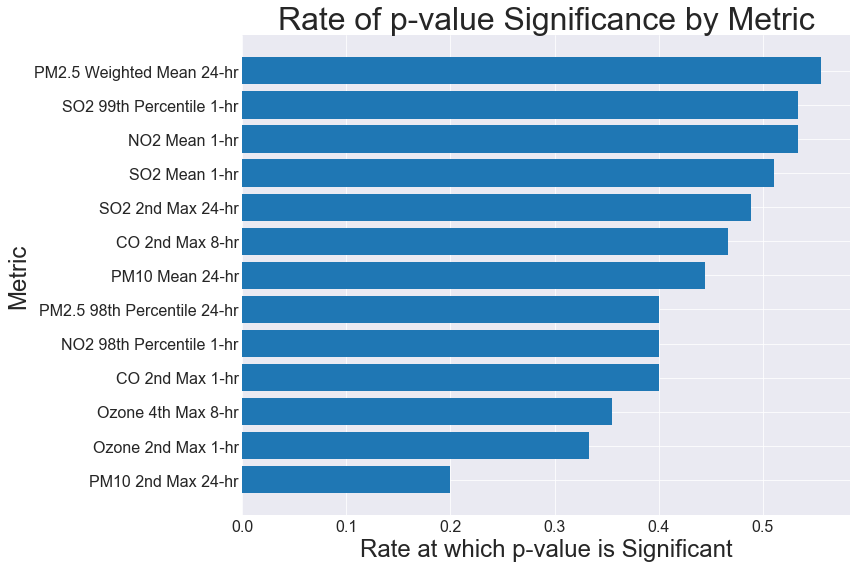

In [262]:
get_pvalue_bar(all_cities_corr, 'location')

In [24]:
corr_df_lst

[       Location                        index  Correlation Coefficient  \
 0   Albuquerque              CO 2nd Max 1-hr                 0.055738   
 1   Albuquerque              CO 2nd Max 8-hr                 0.181108   
 2   Albuquerque     NO2 98th Percentile 1-hr                -0.261378   
 3   Albuquerque                NO2 Mean 1-hr                 0.194113   
 4   Albuquerque           Ozone 2nd Max 1-hr                 0.138491   
 5   Albuquerque           Ozone 4th Max 8-hr                 0.139424   
 6   Albuquerque     SO2 99th Percentile 1-hr                 0.643823   
 7   Albuquerque            SO2 2nd Max 24-hr                 0.203716   
 8   Albuquerque                SO2 Mean 1-hr                 0.311181   
 9   Albuquerque  PM2.5 98th Percentile 24-hr                 0.340750   
 10  Albuquerque    PM2.5 Weighted Mean 24-hr                 0.415057   
 11  Albuquerque           PM10 2nd Max 24-hr                 0.264884   
 12  Albuquerque              PM10 Mea

In [26]:
denver_df = corr_df_lst[denver_index].set_index('Location')
denver_df

,index,Correlation Coefficient,p-value,Significant?
Location,,,,
Denver,CO 2nd Max 1-hr,0.378319,0.050011,False
Denver,CO 2nd Max 8-hr,0.298694,0.100407,False
Denver,NO2 98th Percentile 1-hr,0.139271,0.279071,False
Denver,NO2 Mean 1-hr,-0.170345,0.236370,False
Denver,Ozone 2nd Max 1-hr,0.231760,0.162755,False
Denver,Ozone 4th Max 8-hr,0.305208,0.095347,False
Denver,SO2 99th Percentile 1-hr,0.480382,0.016023,True
Denver,SO2 2nd Max 24-hr,0.321820,0.083227,False
Denver,SO2 Mean 1-hr,0.273673,0.121493,False


In [27]:
ny_df = corr_df_lst[ny_index].set_index('Location')

In [48]:
def get_colors(df, column):
    color_lst = []
    for val in df[column]:
        if val:
            color_lst.append('blue')
        else:
            color_lst.append('red')
    return color_lst

In [49]:
get_colors(denver_df, 'Significant?')

['red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red']

In [102]:
def get_corr_bar(df, color_col, title, write_to):
    fig, ax = plt.subplots(figsize=(12, 8))
    color_lst = get_colors(df, color_col)
    colors = {'Not Significant':'red', 'Significant':'blue'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),0,1, color=colors[label]) for label in labels]
    ax.barh(df['index'], df['Correlation Coefficient'], color=color_lst)
    ax.set_title(title, size=32, x=.4)
    ax.set_ylabel('Metric', size=20)
    ax.set_xlabel('Correlation Coefficient', size=20)
    ax.legend(handles, labels, fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    fig.tight_layout()
    plt.savefig(write_to)
    plt.show()

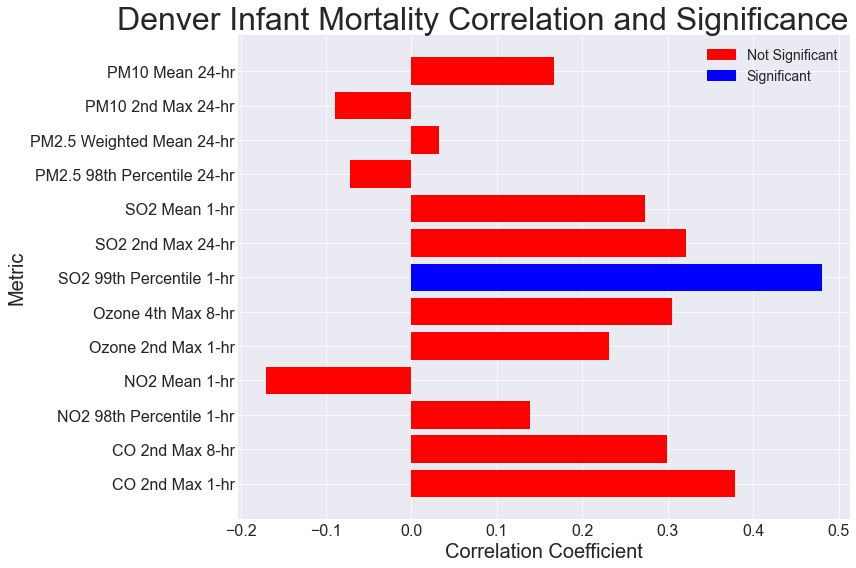

In [83]:
get_corr_bar(denver_df, 'Significant?', 'Denver Infant Mortality Correlation and Significance', '../images/denver_corr_sig.png')

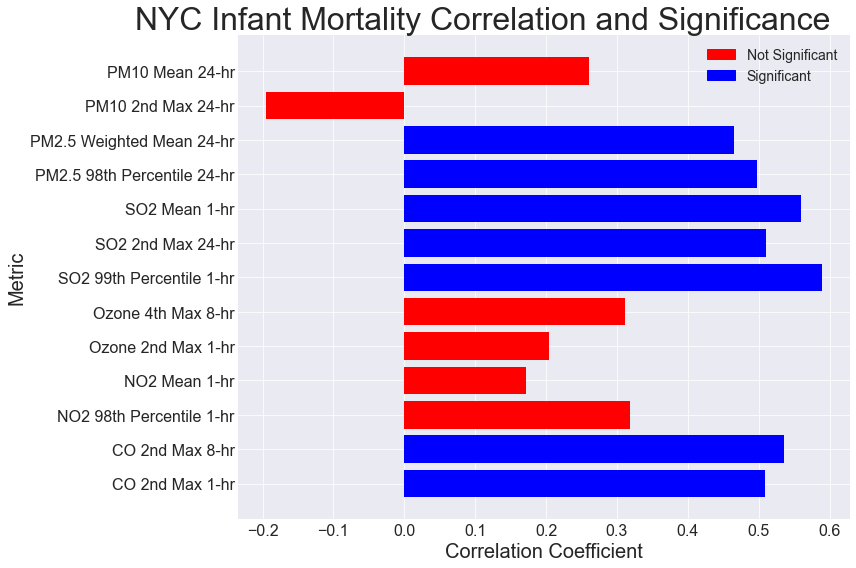

In [82]:
get_corr_bar(ny_df, 'Significant?', 'NYC Infant Mortality Correlation and Significance', '../images/nyc_corr_sig.png')

In [85]:
nyc_data = pd.read_csv('../data/cleaned/new_york.csv', index_col='Unnamed: 0')
nyc_data

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
CO 2nd Max 1-hr,10.00,8.500,8.600,6.400,11.200,5.400,4.800,5.400,3.100000,3.400000,4.200,5.700,4.000,3.200,3.100,3.100,2.700,5.200,2.300,4.800
CO 2nd Max 8-hr,6.60,4.800,4.800,4.400,3.300,3.300,3.400,2.900,2.400000,2.100000,2.100,2.200,2.800,2.500,1.900,2.500,1.900,2.500,1.600,2.700
NO2 98th Percentile 1-hr,100.00,106.000,100.000,97.000,84.000,81.000,83.000,86.000,79.000000,77.000000,72.000,71.000,71.000,67.000,62.000,70.000,68.000,60.000,67.000,68.000
NO2 Mean 1-hr,42.00,41.000,40.000,40.000,32.000,30.000,36.000,34.000,34.000000,26.000000,26.000,22.000,25.000,22.000,22.000,22.000,22.000,20.000,20.000,19.000
Ozone 2nd Max 1-hr,0.15,0.140,0.140,0.150,0.140,0.110,0.140,0.150,0.130000,0.130000,0.100,0.120,0.120,0.120,0.120,0.110,0.100,0.100,0.110,0.110
Ozone 4th Max 8-hr,0.11,0.114,0.108,0.125,0.102,0.088,0.101,0.101,0.094000,0.087000,0.081,0.087,0.089,0.085,0.078,0.074,0.079,0.078,0.079,0.079
SO2 99th Percentile 1-hr,79.00,86.000,71.000,67.000,74.000,69.000,72.000,70.000,62.000000,62.000000,61.000,50.000,41.000,32.000,22.000,15.000,15.000,7.000,7.000,8.000
SO2 2nd Max 24-hr,45.00,46.000,46.000,39.000,51.000,35.000,39.000,34.000,36.000000,26.000000,26.000,24.000,20.000,12.000,10.000,10.000,7.000,4.000,4.000,4.000
SO2 Mean 1-hr,13.00,13.000,12.000,12.000,11.000,10.000,11.000,10.000,10.000000,7.000000,6.000,5.000,5.000,3.000,2.000,2.000,2.000,1.000,1.000,1.000
PM2.5 98th Percentile 24-hr,39.00,44.000,42.000,48.000,47.000,45.000,43.000,42.000,39.000000,34.000000,33.000,28.000,33.000,26.000,31.000,31.000,29.000,21.000,23.000,27.000


In [99]:
asthma_corr = pd.DataFrame(nyc_data.corrwith(nyc_data.loc['Asthma Hosp. Rate'], axis=1), columns=['Correlation Coefficient'])
asthma_corr['p-value'] = (get_pvalue_from_corr(asthma_corr['Correlation Coefficient'], 20))
asthma_corr['Significant?'] = asthma_corr['p-value'] <= .025
asthma_corr.drop('Asthma Hosp. Rate', inplace=True)
asthma_corr.drop('Infant Mortality Rate', inplace=True)


asthma_corr.reset_index(inplace=True)
asthma_corr

,index,Correlation Coefficient,p-value,Significant?
0,CO 2nd Max 1-hr,0.763206,4.531042e-05,True
1,CO 2nd Max 8-hr,0.662969,7.214668e-04,True
2,NO2 98th Percentile 1-hr,0.797547,1.267125e-05,True
3,NO2 Mean 1-hr,0.789181,1.765147e-05,True
4,Ozone 2nd Max 1-hr,0.636546,1.273588e-03,True
5,Ozone 4th Max 8-hr,0.776860,2.803134e-05,True
6,SO2 99th Percentile 1-hr,0.920044,4.732053e-09,True
7,SO2 2nd Max 24-hr,0.950903,6.582919e-11,True
8,SO2 Mean 1-hr,0.907278,1.711240e-08,True
9,PM2.5 98th Percentile 24-hr,0.887651,8.948559e-08,True


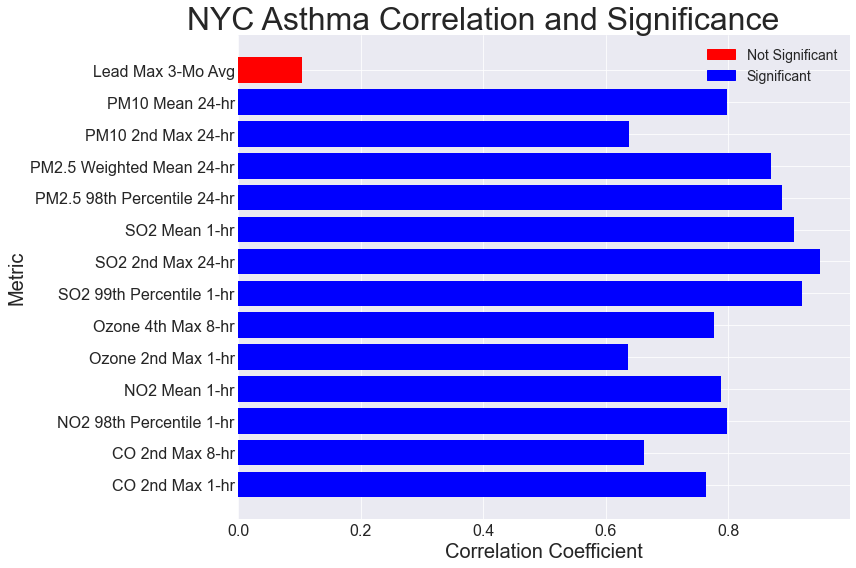

In [103]:
get_corr_bar(asthma_corr, 'Significant?', 'NYC Asthma Correlation and Significance', '../images/asthma_corr_sig.png')